# Initial system setup

When using this notebook in your *local* Jupyter, follow these steps to set up your system:

- install [Graphviz](https://graphviz.org/download/) for the graph rendering.
- install the library descriptor `tag.json` from https://raw.githubusercontent.com/HuygensING/tag-jupyter/master/tag.json in `<UserHome>/.jupyter_kotlin/libraries`
- restart this notebook.

# Setting up the TAG environment

In [1]:
%use tag

Welcome to TAG
Using GraphViz: dot - graphviz version 2.44.1 (20200629.0846)



# Tokenizing a TAGML text

In [2]:
val tokens = TAG.tokenize(Paths.get("test.tagml"))
tokens.joinToString("\n")

Warnings:

* line 6: Element "tagml" is not defined in the ontology.
[tagml>[book>[title>Foo Bar<title][chapter>[l>Lorem ipsum dolar amacet.<l]<chapter]<book]<tagml]
-------

* line 6: Element "book" is not defined in the ontology.
[tagml>[book>[title>Foo Bar<title][chapter>[l>Lorem ipsum dolar amacet.<l]<chapter]<book]<tagml]
       ------

* line 6: Element "title" is not defined in the ontology.
[tagml>[book>[title>Foo Bar<title][chapter>[l>Lorem ipsum dolar amacet.<l]<chapter]<book]<tagml]
             -------

* line 6: Element "chapter" is not defined in the ontology.
[tagml>[book>[title>Foo Bar<title][chapter>[l>Lorem ipsum dolar amacet.<l]<chapter]<book]<tagml]
                                  ---------

* line 6: Element "l" is not defined in the ontology.
[tagml>[book>[title>Foo Bar<title][chapter>[l>Lorem ipsum dolar amacet.<l]<chapter]<book]<tagml]
                                           ---


Range{1:1 - 5:4} [!{":ontology":{"root":"tagml"}}!]
Range{6:1 - 6:8} [tagml>
Range{6:8 - 6:14} [book>
Range{6:14 - 6:21} [title>
Range{6:21 - 6:28} Foo Bar
Range{6:28 - 6:35} <title]
Range{6:35 - 6:44} [chapter>
Range{6:44 - 6:47} [l>
Range{6:47 - 6:72} Lorem ipsum dolar amacet.
Range{6:72 - 6:75} <l]
Range{6:75 - 6:84} <chapter]
Range{6:84 - 6:90} <book]
Range{6:90 - 6:97} <tagml]

# Constructing the Multi-Colored Tree from the tokens

In [3]:
val mct = tokens.asMCT()
mct.nodes.forEach{println(it)}

Markup(tagml)
Markup(book)
Markup(title)
Text(Foo Bar)
Markup(chapter)
Markup(l)
Text(Lorem ipsum dolar amacet.)


# Visualizing the MCT

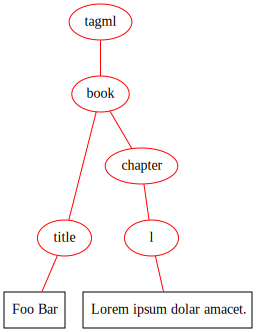

In [4]:
mct.show()

# How parsing errors & warnings are shown

In [5]:
val tokens = TAG.tokenize(File("bad.tagml"))
tokens

Warnings:

* line 6: Element "tzzagml" is not defined in the ontology.
[tzzagml>[book>[title>Foo Bar<title][chapter>[l>Lorem ipsum dolar amacet.<l]<chapter]<book]<tagml]
---------

* line 6: Element "book" is not defined in the ontology.
[tzzagml>[book>[title>Foo Bar<title][chapter>[l>Lorem ipsum dolar amacet.<l]<chapter]<book]<tagml]
         ------

* line 6: Element "title" is not defined in the ontology.
[tzzagml>[book>[title>Foo Bar<title][chapter>[l>Lorem ipsum dolar amacet.<l]<chapter]<book]<tagml]
               -------

* line 6: Element "chapter" is not defined in the ontology.
[tzzagml>[book>[title>Foo Bar<title][chapter>[l>Lorem ipsum dolar amacet.<l]<chapter]<book]<tagml]
                                    ---------

* line 6: Element "l" is not defined in the ontology.
[tzzagml>[book>[title>Foo Bar<title][chapter>[l>Lorem ipsum dolar amacet.<l]<chapter]<book]<tagml]
                                             ---


nl.knaw.huygens.tag.jupyter.TAG$TAGMLParseError: 
Errors:

* line 6: Root element "tzzagml" does not match the one defined in the header: "tagml"
[tzzagml>[book>[title>Foo Bar<title][chapter>[l>Lorem ipsum dolar amacet.<l]<chapter]<book]<tagml]
---------

* line 6: Closing tag "<tagml]" found without corresponding open tag.
[tzzagml>[book>[title>Foo Bar<title][chapter>[l>Lorem ipsum dolar amacet.<l]<chapter]<book]<tagml]
                                                                                           -------


# TAGML with overlap

[!{
  ":ontology": {
    "root": "tagml"
  }
}!]
[tagml|+X,+Y>[x|X>Romeo [y|Y>loves<x] Juliet<y]<tagml]

Warnings:

* line 6: Element "tagml" is not defined in the ontology.
[tagml|+X,+Y>[x|X>Romeo [y|Y>loves<x] Juliet<y]<tagml]
-------------

* line 6: Element "x" is not defined in the ontology.
[tagml|+X,+Y>[x|X>Romeo [y|Y>loves<x] Juliet<y]<tagml]
             -----

* line 6: Element "y" is not defined in the ontology.
[tagml|+X,+Y>[x|X>Romeo [y|Y>loves<x] Juliet<y]<tagml]
                        -----


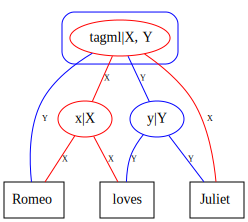

In [6]:
val tagml = ("""
    |[!{
    |  ":ontology": {
    |    "root": "tagml"
    |  }
    |}!]
    |[tagml|+X,+Y>[x|X>Romeo [y|Y>loves<x] Juliet<y]<tagml]
    |""".trimMargin())
println(tagml)
val tokens = TAG.tokenize(tagml)
val mct = tokens.asMCT()
mct.show()

# Generating a basic header from a TAGML body

In [7]:
val body = "[body id=1 title='test'>[m:q speaker->marty0001>The way I see it,<-m:q] he said, [+m:q>if you’re going to build a time machine into a car, why not do it with some style?<m:q][x:note text=\"about the DeLorean\"]<body]"

val header = TAG.inferHeader(body)

println(header)

[!{
  ":entities": {
    "marty0001": {}
  },
  ":namespaces": {
    "m": "https://example.org/ns/m",
    "x": "https://example.org/ns/x"
  },
  ":ontology": {
    "root": "body",
    "elements": {
      "body": {
        "description": "...",
        "attributes": [
          "id",
          "title"
        ]
      },
      "m:q": {
        "description": "...",
        "attributes": [
          "speaker"
        ],
        "properties": [
          "discontinuous"
        ]
      },
      "x:note": {
        "description": "...",
        "properties": [
          "milestone"
        ],
        "attributes": [
          "text"
        ]
      }
    },
    "attributes": {
      "id": {
        "description": "...",
        "dataType": "Integer"
      },
      "title": {
        "description": "...",
        "dataType": "String"
      },
      "speaker": {
        "description": "...",
        "dataType": "Pointer"
      },
      "text": {
        "description": "...",
        "dataType

### Using this header, the TAGML can be parsed

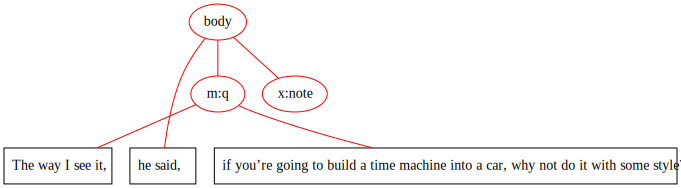

In [8]:
val tagml = header + body
val tokens = TAG.tokenize(tagml)
val mct = tokens.asMCT()
mct.show()